Data Exploration Notebook: 
1. Load COMPAS datasets compas-scores-raw.csv and ???
Understand structure, types, and nulls

2. Feature selection of the defined 7 variables provided from Dressel & Farid (2018):  
age, sex, number of juvenile misdemeanors, number of juvenile felonies, number of prior (nonjuvenile) crimes, crime degree, crime charge.

3. Encoding & preprocessing
4. Visualizations:
    Class distribution
    Feature distributions
    Correlation heatmap

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Data exploration: compas-scores-raw.csv

# Load dataset compas-scores-raw.csv
df = pd.read_csv("../data/compas-scores-raw.csv")
df.head()
print("\nPreview of raw file columns:")
print(df.head())

# Initial data overview
print("\ncompas-scores-raw.csv dataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))



Preview of raw file columns:
   Person_ID  AssessmentID  Case_ID Agency_Text LastName FirstName MiddleName  \
0      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
1      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
2      50844         57167    51950    PRETRIAL   Fisher     Kevin        NaN   
3      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   
4      50848         57174    51956    PRETRIAL  KENDALL     KEVIN        NaN   

  Sex_Code_Text Ethnic_Code_Text DateOfBirth  ...  RecSupervisionLevel  \
0          Male        Caucasian    12/05/92  ...                    1   
1          Male        Caucasian    12/05/92  ...                    1   
2          Male        Caucasian    12/05/92  ...                    1   
3          Male        Caucasian    09/16/84  ...                    1   
4          Male        Caucasian    09/16/84  ...                    1   

  RecSupervisionLevelText Scale_ID    

Some datatypes need to be reformatted: 

In [ ]:
df.DateOfBirth = pd.to_datetime(df['DateOfBirth'])
df.Screening_Date = pd.to_datetime(df['Screening_Date'])
df.dtypes

C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\4006156214.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.DateOfBirth = pd.to_datetime(df['DateOfBirth'])
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\4006156214.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Screening_Date = pd.to_datetime(df['Screening_Date'])


Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

Show all columns to check if required 7 features are visible.
age, sex, number of juvenile misdemeanors, number of juvenile felonies, number of prior (nonjuvenile) crimes, crime degree, crime charge.
--> data set seems not to yet to contain these:

In [30]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

Check for missing values, nulls, duplicates:

In [ ]:
# Check for missing values
print("\nmissing values per column:")
print(df.isnull().sum())

# Check for total number of nulls in the entire dataset
total_nulls = df.isnull().sum().sum()
print(f"\ntotal number of null values in the dataset: {total_nulls}")

# Check for percentage of missing values per column
print("\npercentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nnumber of duplicate rows: {num_duplicates}")

# Optional: show duplicate rows if any
if num_duplicates > 0:
    print("\nduplicate rows:")
    print(df[df.duplicated()])
# df = df.drop_duplicates()



missing values per column:
Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45219
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

total number of null values in the

In [34]:
# Data exploration: cox-violent-parsed.csv 

# Load dataset cox-violent-parsed.csv
df = pd.read_csv("../data/cox-violent-parsed.csv")
df.head()
print("\nPreview of parsed file columns:")
print(df.head())

# Initial data overview
print("\ncox-violent-parsed.csv dataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))

# List all columns
df.columns

# Reformat datatypes
date_columns = ["compas_screening_date", "dob", "c_offense_date", "c_arrest_date", "r_offense_date", "r_jail_in", "r_jail_out", "vr_offense_date", "screening_date", "v_screening_date", "in_custody", "out_custody"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")
print(df[date_columns].dtypes)

# Check for missing values
print("\nmissing values per column:")
print(df.isnull().sum())

# Check for total number of nulls in the entire dataset
total_nulls = df.isnull().sum().sum()
print(f"\ntotal number of null values in the dataset: {total_nulls}")

# Check for percentage of missing values per column
print("\npercentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nnumber of duplicate rows: {num_duplicates}")

# Optional: show duplicate rows if any
if num_duplicates > 0:
    print("\nduplicate rows:")
    print(df[df.duplicated()])
# df = df.drop_duplicates()


Preview of parsed file columns:
    id              name    first       last compas_screening_date   sex  \
0  1.0  miguel hernandez   miguel  hernandez            14/08/2013  Male   
1  2.0  miguel hernandez   miguel  hernandez            14/08/2013  Male   
2  3.0      michael ryan  michael       ryan            31/12/2014  Male   
3  4.0       kevon dixon    kevon      dixon            27/01/2013  Male   
4  5.0          ed philo       ed      philo            14/04/2013  Male   

          dob  age          age_cat              race  ...  \
0  18/04/1947   69  Greater than 45             Other  ...   
1  18/04/1947   69  Greater than 45             Other  ...   
2  06/02/1985   31          25 - 45         Caucasian  ...   
3  22/01/1982   34          25 - 45  African-American  ...   
4  14/05/1991   24     Less than 25  African-American  ...   

   v_type_of_assessment  v_decile_score  v_score_text  v_screening_date  \
0      Risk of Violence               1           Low        1

C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2058543986.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2058543986.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2058543986.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2058543986.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was sp

id                          7315
name                           0
first                          0
last                           0
compas_screening_date          0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_case_number                867
c_offense_date              3952
c_arrest_date              17175
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_case_number               9899
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date             14963
r_charge_desc              10039
r_jail_in 

In [ ]:
# Data exploration: cox-violent-parsed_filt.csv 

# Load dataset cox-violent-parsed_filt.csv
df = pd.read_csv("../data/cox-violent-parsed_filt.csv")
df.head()
print("\nPreview of parsed file columns:")
print(df.head())

# Initial data overview
print("\ncox-violent-parsed_filt.csv dataset info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))

# List all columns
df.columns

# Reformat datatypes
date_columns = ["dob", "c_jail_in", "c_jail_out", "r_offense_date", "r_jail_in", "vr_offense_date", "screening_date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors="coerce")
print(df[date_columns].dtypes)

# Check for missing values
print("\nmissing values per column:")
print(df.isnull().sum())

# Check for total number of nulls in the entire dataset
total_nulls = df.isnull().sum().sum()
print(f"\ntotal number of null values in the dataset: {total_nulls}")

# Check for percentage of missing values per column
print("\npercentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nnumber of duplicate rows: {num_duplicates}")

# Optional: show duplicate rows if any
if num_duplicates > 0:
    print("\nduplicate rows:")
    print(df[df.duplicated()])




Preview of parsed file columns:
    id              name    first       last   sex         dob  age  \
0  1.0  miguel hernandez   miguel  hernandez  Male  18/04/1947   69   
1  2.0  miguel hernandez   miguel  hernandez  Male  18/04/1947   69   
2  3.0      michael ryan  michael       ryan  Male  06/02/1985   31   
3  4.0       kevon dixon    kevon      dixon  Male  22/01/1982   34   
4  5.0          ed philo       ed      philo  Male  14/05/1991   24   

           age_cat              race  juv_fel_count  ...  \
0  Greater than 45             Other              0  ...   
1  Greater than 45             Other              0  ...   
2          25 - 45         Caucasian              0  ...   
3          25 - 45  African-American              0  ...   
4     Less than 25  African-American              0  ...   

                vr_charge_desc  type_of_assessment  decile_score.1  \
0                          NaN  Risk of Recidivism               1   
1                          NaN  Risk of

C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2596103058.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2596103058.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2596103058.py:22: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors="coerce")
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\2596103058.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the def

id                          39.94
name                         0.00
first                        0.00
last                         0.00
sex                          0.00
dob                          0.00
age                          0.00
age_cat                      0.00
race                         0.00
juv_fel_count                0.00
decile_score                 0.00
juv_misd_count               0.00
juv_other_count              0.00
priors_count                 0.00
days_b_screening_arrest      7.08
c_jail_in                    7.08
c_jail_out                   7.08
c_days_from_compas           4.73
c_charge_degree              4.73
c_charge_desc                4.81
is_recid                     0.00
r_charge_degree             54.05
r_days_from_arrest          65.28
r_offense_date              81.69
r_charge_desc               54.81
r_jail_in                   65.28
violent_recid              100.00
is_violent_recid             0.00
vr_charge_degree            92.69
vr_offense_dat

Results of dataset and feature selection: 

1. compas-scores-raw.csv contains raw source data, most features needed for modeling are missing, as well as information required for engineering missing features.
2. cox-violent-parsed.csv is the most detailed and enriched dataset including criminal history features and recidivism flags. Provides all required features.
3. cox-violent-parsed_filt.csv is a filtered subset of the parsed dataset, with fewer columns and thus is a cleaner option. Provides all required features.
4. propublica_data_for_fairml.csv contains pre-engineered, binary-encoded data but has only very few details regarding required features.

Consider the features that should be selected:
age, sex, number of juvenile misdemeanors, number of juvenile felonies, number of prior (nonjuvenile) crimes, crime degree, crime charge.
Translate to feature columns: 
"age", "sex", "juv_misd_count", "juv_fel_count", "priors_count", "c_charge_degree",	"c_charge_desc", "is_recid" (target)
--> Choose dataset cox-violent-parsed_filt.csv due to availability of all features and cleanest structure and screen again: 

In [53]:
# Data exploration for selected 7 features in cox-violent-parsed_filt.csv

# Load dataset
df = pd.read_csv("../data/cox-violent-parsed_filt.csv")

# Select relevant features
selected_features = ["age", "sex", "juv_misd_count", "juv_fel_count",
    "priors_count", "c_charge_degree", "c_charge_desc", "is_recid"
]
df_selected = df[selected_features].copy()

# Initial data overview
print("\noverview of selected data:")
print(df_selected.info())

# Check structure and preview
print("shape of selected data:", df_selected.shape)
print("\npreview:")
print(df_selected.head())

# Check for missing values per column
print("\nmissing values per column:")
print(df_selected.isnull().sum())

# Percentage of missing values per column
print("\npercentage of missing values:")
print((df_selected.isnull().mean() * 100).round(2))

# Check for total null values
print("\ntotal number of null values:", df_selected.isnull().sum().sum())

# Check for duplicates
duplicate_count = df_selected.duplicated().sum()
print(f"\nnumber of duplicate rows: {duplicate_count}")

# Show duplicates if any
if duplicate_count > 0:
    print("\nduplicate rows:")
    print(df_selected[df_selected.duplicated()])

# Descriptive statistics for numeric features
print("\nsummary statistics (numeric):")
print(df_selected.describe().round(2))

# Value counts for categorical features
print("\nvalue counts for categorical features:")
print("\nsex:")
print(df_selected["sex"].value_counts(dropna=False))

print("\nc_charge_degree:")
print(df_selected["c_charge_degree"].value_counts(dropna=False))

print("\nc_charge_desc (top 10):")
print(df_selected["c_charge_desc"].value_counts(dropna=False).head(10))



overview of selected data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              18316 non-null  int64 
 1   sex              18316 non-null  object
 2   juv_misd_count   18316 non-null  int64 
 3   juv_fel_count    18316 non-null  int64 
 4   priors_count     18316 non-null  int64 
 5   c_charge_degree  17449 non-null  object
 6   c_charge_desc    17435 non-null  object
 7   is_recid         18316 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.1+ MB
None
shape of selected data: (18316, 8)

preview:
   age   sex  juv_misd_count  juv_fel_count  priors_count c_charge_degree  \
0   69  Male               0              0             0            (F3)   
1   69  Male               0              0             0            (F3)   
2   31  Male               0              0             0             NaN   
3   34

Deduplication: When checking on duplicates before and after feature selection, there is a huge difference. This implies that duplicates can only be dropped with a smart strategy that defines unique charges by a subset of columns before selecting the seven features.
We check if the whole row (all features) are identic except the first "id" column. 

In [55]:
# Deduplication of cox-violent-parsed_filt.csv

# Load the full dataset again
df_full = pd.read_csv("../data/cox-violent-parsed_filt.csv")

# Identify the ID column, if available
# We'll assume there is an "id" column or similar identifier
id_column = "id" if "id" in df_full.columns else None

# Define the deduplication logic: drop duplicates based on all columns except ID
if id_column:
    dedup_columns = [col for col in df_full.columns if col != id_column]
else:
    # If no clear ID column, fall back to full-row deduplication
    dedup_columns = df_full.columns.tolist()

# Drop duplicates based on all columns except the ID
df_deduped = df_full.drop_duplicates(subset=dedup_columns, keep="first")

# Save the deduplicated dataset
deduped_path = "../data/cox_violent_parsed_filt_deduped.csv"
df_deduped.to_csv(deduped_path, index=False)

# Report results
dedup_summary = {
    "original_rows": df_full.shape[0],
    "rows_after_deduplication": df_deduped.shape[0],
    "duplicates_removed": df_full.shape[0] - df_deduped.shape[0],
    "saved_as": deduped_path
}

dedup_summary


{'original_rows': 18316,
 'rows_after_deduplication': 11300,
 'duplicates_removed': 7016,
 'saved_as': '../data/cox_violent_parsed_filt_deduped.csv'}

Check on the new deduped file after feature selection if there are any duplicates left. This is only informational.
If any, we will keep them anyhow as they appeared after feature selection: 

In [57]:
# Load the deduplicated dataset
deduped_df = pd.read_csv("../data/cox_violent_parsed_filt_deduped.csv")

# Select relevant features including target
selected_features = [
    "age", "sex", "juv_misd_count", "juv_fel_count",
    "priors_count", "c_charge_degree", "c_charge_desc", "is_recid"
]
df_selected = deduped_df[selected_features].copy()

# Check for duplicates based on the selected features
total_rows = df_selected.shape[0]
duplicate_rows = df_selected.duplicated().sum()
unique_rows = total_rows - duplicate_rows

# Return summary
{
    "total_rows": total_rows,
    "duplicate_rows": duplicate_rows,
    "unique_rows": unique_rows
}



{'total_rows': 11300,
 'duplicate_rows': np.int64(3140),
 'unique_rows': np.int64(8160)}

Feature selection - permanent now: 

In [59]:
import pandas as pd

# A) Load the full deduplicated dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_deduped.csv")

# B) Select only the modeling features
selected_features = [
    "age", "sex", "juv_misd_count", "juv_fel_count",
    "priors_count", "c_charge_degree", "c_charge_desc", "is_recid"
]
df_selected = df[selected_features].copy()

# C) Save the feature-selected dataset before any further cleaning
output_selected_path = "../data/cox_violent_parsed_filt_dedup_featureselected.csv"
df_selected.to_csv(output_selected_path, index=False)

# Return path and shape for confirmation
{
    "saved_file": output_selected_path,
    "shape": df_selected.shape
}


{'saved_file': '../data/cox_violent_parsed_filt_dedup_featureselected.csv',
 'shape': (11300, 8)}

A) Two categorical columns c_charge_degree and c_charge_desc show missing values. We further analyze if empty values of both features occur at the same time. If so, removing these lines would reduce the data set <5% which makes it a safe decision, especially in terms of bias reduction. B) total number of null values: 1748. We examine where they occur, if they are part of binary or categorical features. 
C) is_recid can be filtered out as unknown category.

In [60]:
# Load the latest deduplicated file again
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected.csv")

# A) Analyze if missing values in both categorical columns occur together
missing_both = df["c_charge_degree"].isna() & df["c_charge_desc"].isna()
num_missing_both = missing_both.sum()
percent_missing_both = round((num_missing_both / df.shape[0]) * 100, 2)

# B) Total number of null values
total_nulls = df.isnull().sum().sum()

# C) Detailed null breakdown by column
null_summary = df.isnull().sum()
null_summary = null_summary[null_summary > 0].sort_values(ascending=False)

# D) Count and filter unknown category in target
unknown_recid = df[df["is_recid"] == -1].shape[0]

# Prepare recommendations
recommendations = {
    "rows_with_both_categorical_nulls": num_missing_both,
    "percent_of_total": percent_missing_both,
    "total_null_values": int(total_nulls),
    "null_columns": null_summary.to_dict(),
    "rows_with_is_recid_minus1": unknown_recid
}

recommendations


{'rows_with_both_categorical_nulls': np.int64(694),
 'percent_of_total': np.float64(6.14),
 'total_null_values': 1395,
 'null_columns': {'c_charge_desc': 701, 'c_charge_degree': 694},
 'rows_with_is_recid_minus1': 670}

Further cleaning: 
Rows with both c_charge_desc and c_charge_degree missing still at relatively low level of 6.14% after removing a huge number of lines --> drop these
Null values concentrated on the same two features. 
Rows with is_recid == -1 -> still drop candidate

In [65]:
# Data cleaning: 

# load feature-selected file
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected.csv")

# drop rows where both charge features are missing
df_clean = df[~(df["c_charge_desc"].isna() & df["c_charge_degree"].isna())]

# drop rows where is_recid == -1
df_clean = df_clean[df_clean["is_recid"] != -1]

# confirm nulls are now gone
print("nulls remaining after cleaning:")
print(df_clean.isnull().sum())

# save cleaned dataset
output_path = "../data/cox_violent_parsed_filt_dedup_featureselected.csv"
df_clean.to_csv(output_path, index=False)

# confirm saved
print("cleaned dataset saved to:", output_path)
print("final shape:", df_clean.shape)


nulls remaining after cleaning:
age                0
sex                0
juv_misd_count     0
juv_fel_count      0
priors_count       0
c_charge_degree    0
c_charge_desc      7
is_recid           0
dtype: int64
cleaned dataset saved to: ../data/cox_violent_parsed_filt_dedup_featureselected.csv
final shape: (10605, 8)


In [66]:
# remove remaining nulls in c_charge_desc
df_clean = df_clean[df_clean["c_charge_desc"].notna()]

# save fully cleaned version
final_path = "../data/cox_violent_parsed_filt_dedup_featureselected_cleaned.csv"
df_clean.to_csv(final_path, index=False)

print("final cleaned dataset saved to:", final_path)
print("shape:", df_clean.shape)


final cleaned dataset saved to: ../data/cox_violent_parsed_filt_dedup_featureselected_cleaned.csv
shape: (10598, 8)


Visualizations
1. Visualize target distribution + raw features to get human-readable insights
2. Encode categorical values 
3. Create correlation heatmap

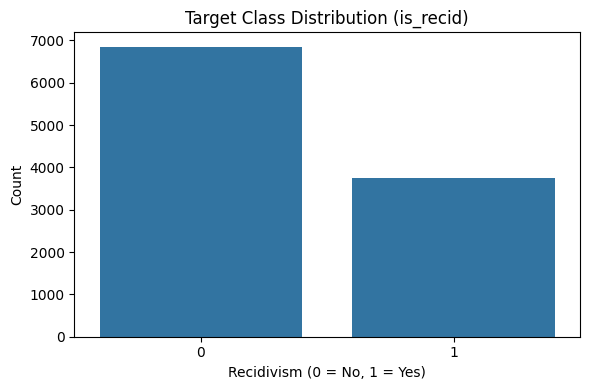

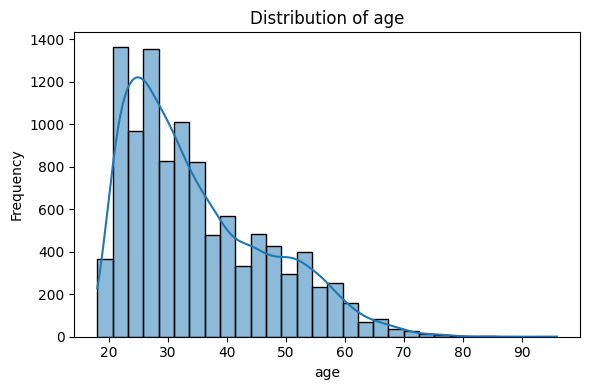

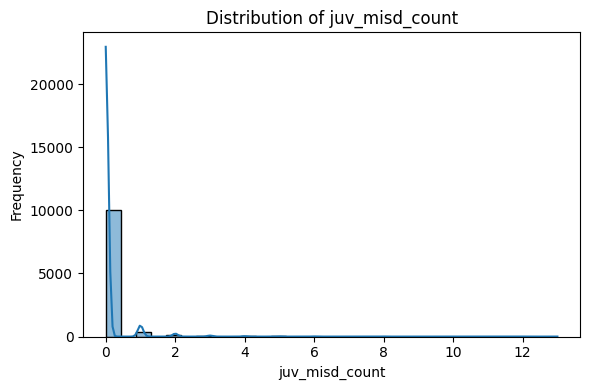

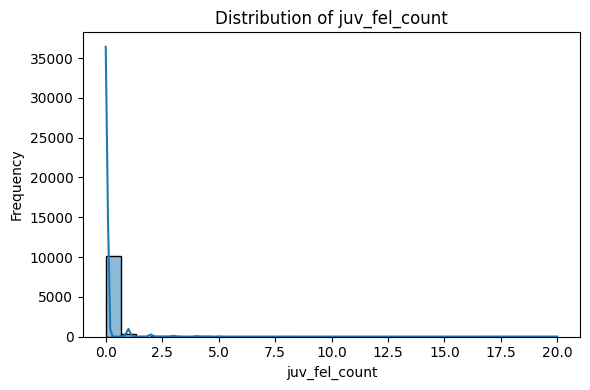

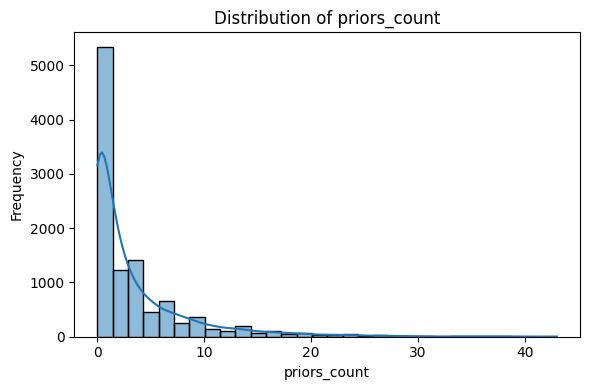

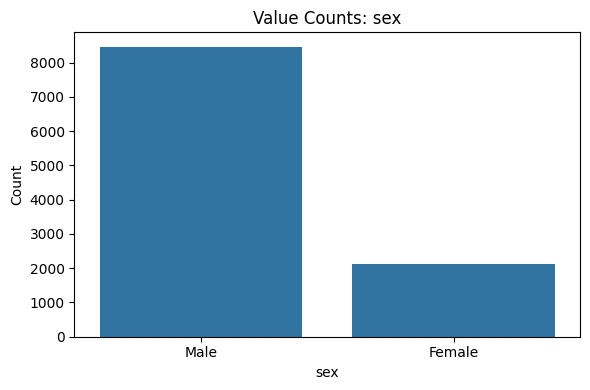

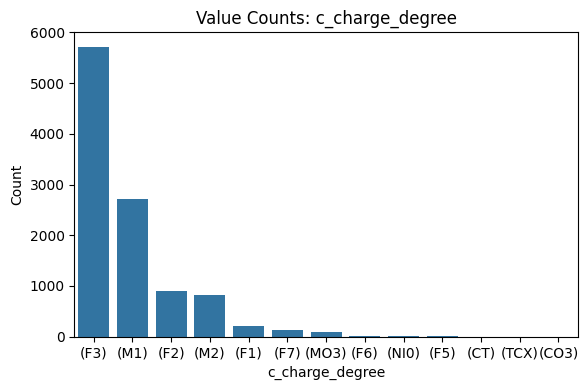

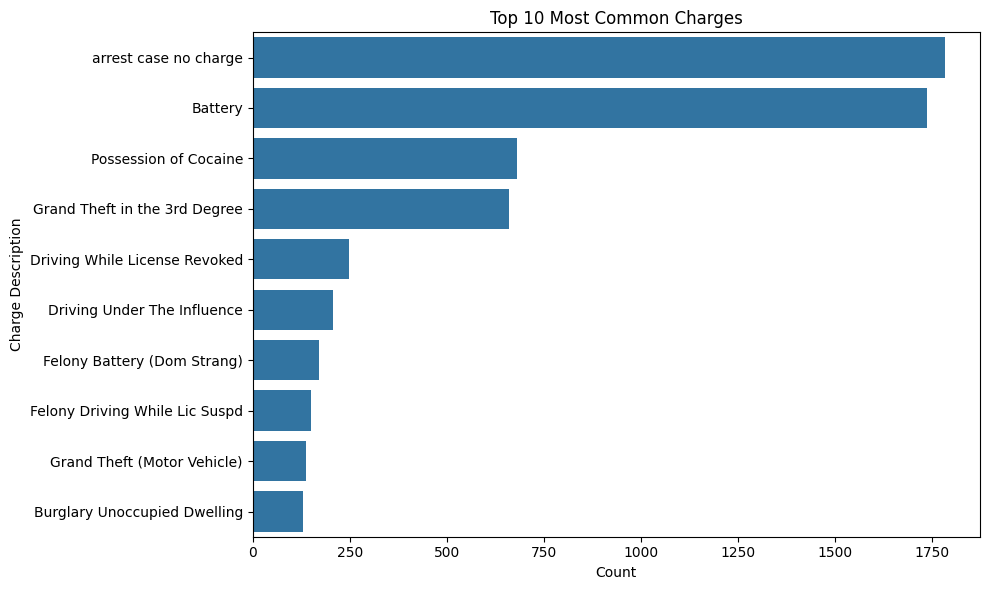

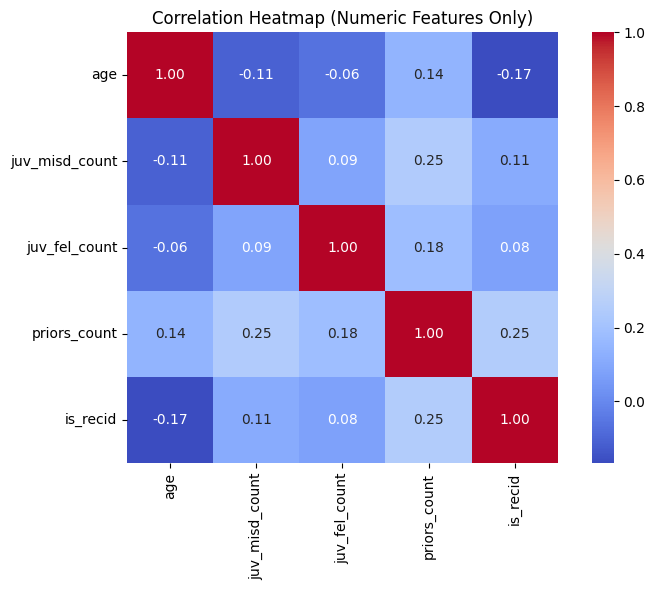

'All plots saved successfully to the ../reports/ directory.'

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create reports directory if it doesn't exist
os.makedirs("../reports", exist_ok=True)

# Load cleaned dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned.csv")

# Step 1: Visualizations

# 1.1 Target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="is_recid", data=df)
plt.title("Target Class Distribution (is_recid)")
plt.xlabel("Recidivism (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../reports/target_class_distribution.png")
plt.show()
plt.close()

# 1.2 Numeric feature distributions
numeric_features = ["age", "juv_misd_count", "juv_fel_count", "priors_count"]

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"../reports/distribution_{col}.png")
    plt.show()
    plt.close()

# 1.3 Categorical feature counts (raw values for human readability)
categorical_features = ["sex", "c_charge_degree"]

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Value Counts: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"../reports/value_counts_{col}.png")
    plt.show()
    plt.close()

# 1.4 Top 10 c_charge_desc counts
plt.figure(figsize=(10, 6))
top_charges = df["c_charge_desc"].value_counts().nlargest(10)
sns.barplot(x=top_charges.values, y=top_charges.index)
plt.title("Top 10 Most Common Charges")
plt.xlabel("Count")
plt.ylabel("Charge Description")
plt.tight_layout()
plt.savefig("../reports/top_10_charges.png")
plt.show()
plt.close()

# Step 2: Correlation heatmap (only numeric features)
df_corr = df[numeric_features + ["is_recid"]]

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.savefig("../reports/correlation_heatmap_numeric.png")
plt.show()
plt.close()

# Confirmation output
"All plots saved successfully to the ../reports/ directory."



Categorical Features: Label encoding needed for further calculation 

In [71]:
import json

# Load cleaned dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned.csv")

# Label encode categorical features
df["sex_encoded"], sex_mapping = pd.factorize(df["sex"])
df["c_charge_degree_encoded"], degree_mapping = pd.factorize(df["c_charge_degree"])
df["c_charge_desc_encoded"], charge_mapping = pd.factorize(df["c_charge_desc"])

# Select final modeling features (encoded only)
df_encoded = df[[
    "age", "juv_misd_count", "juv_fel_count", "priors_count",
    "sex_encoded", "c_charge_degree_encoded", "c_charge_desc_encoded", "is_recid"
]]

# Save to CSV
encoded_path = "../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv"
df_encoded.to_csv(encoded_path, index=False)

# Save mappings for reference
mappings = {
    "sex_mapping": dict(enumerate(sex_mapping)),
    "c_charge_degree_mapping": dict(enumerate(degree_mapping)),
    "c_charge_desc_mapping": dict(enumerate(charge_mapping))
}

{
    "saved_file": encoded_path,
    "shape": df_encoded.shape,
    "mappings": mappings
}

# Export mapping dictionary to data as json file

# Define path to save mapping
mapping_path = "../data/compas_label_encoding_mapping_dictionary.json"

# Create mappings dictionary from previously encoded factors
mappings = {
    "sex_mapping": dict(enumerate(sex_mapping)),
    "c_charge_degree_mapping": dict(enumerate(degree_mapping)),
    "c_charge_desc_mapping": dict(enumerate(charge_mapping))
}

# Write to JSON file
with open(mapping_path, "w", encoding="utf-8") as f:
    json.dump(mappings, f, indent=4)

mapping_path


'../data/compas_label_encoding_mapping_dictionary.json'

Outlier detection and further distribution and correlation insights

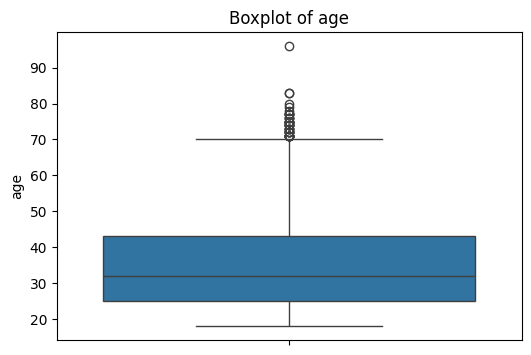

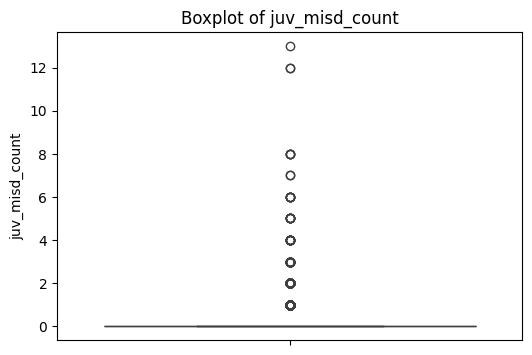

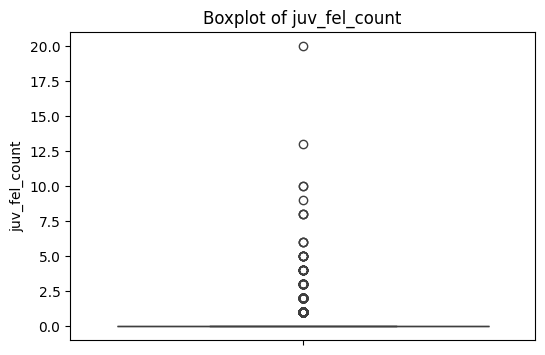

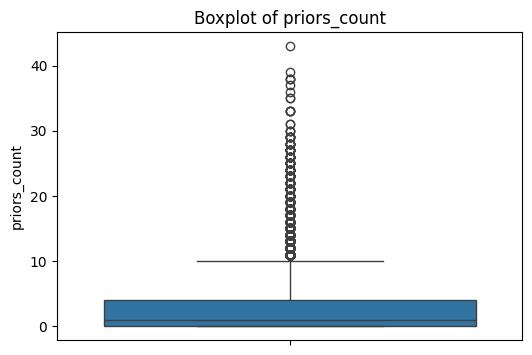

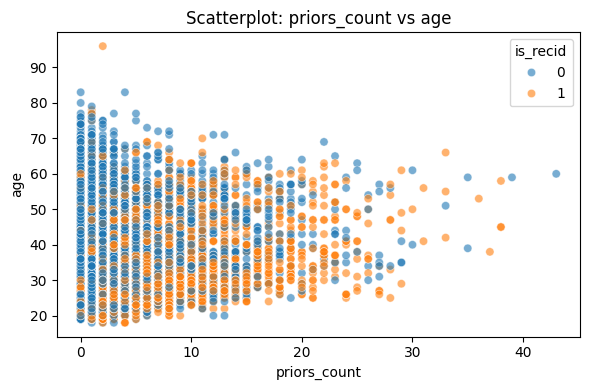

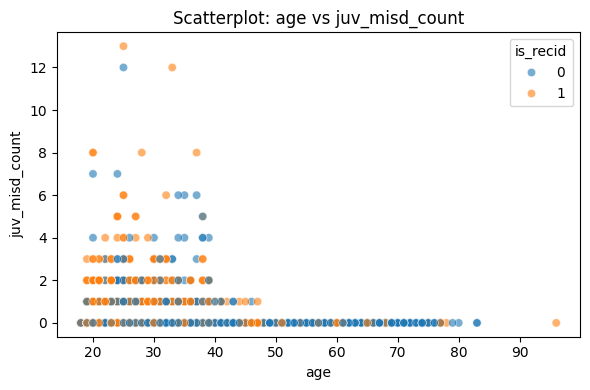

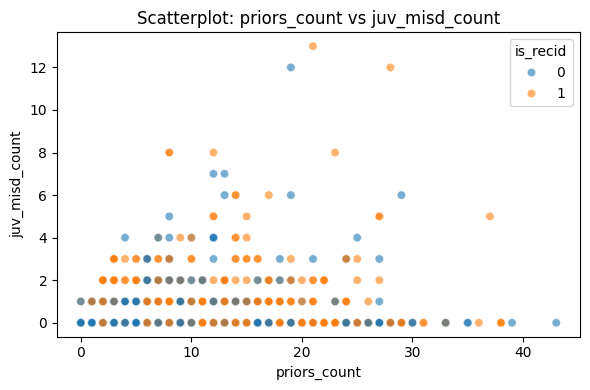

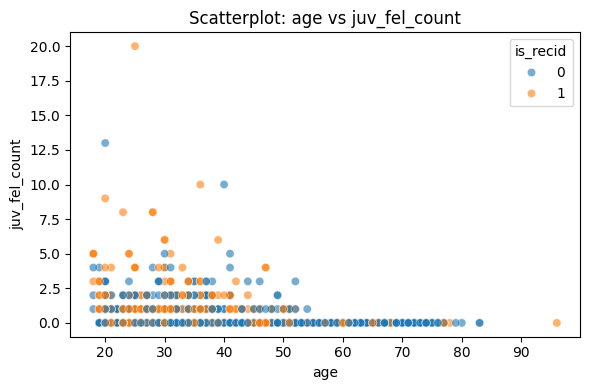

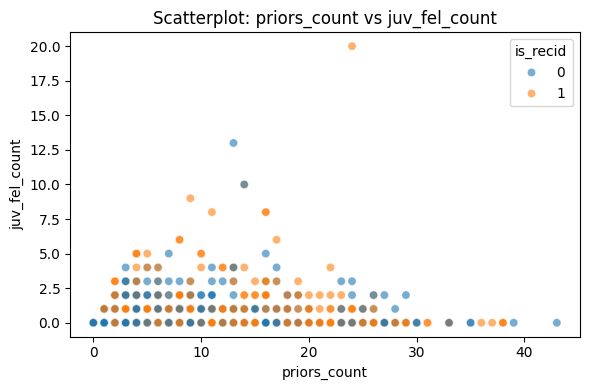

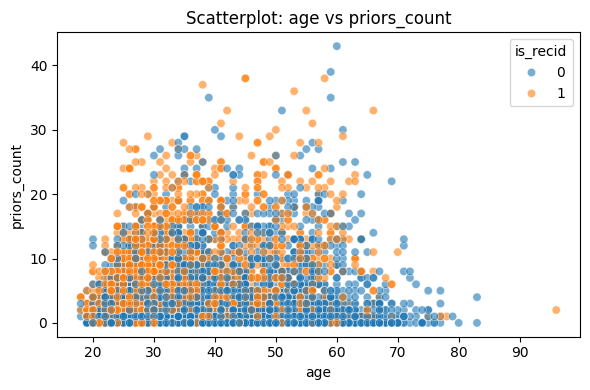

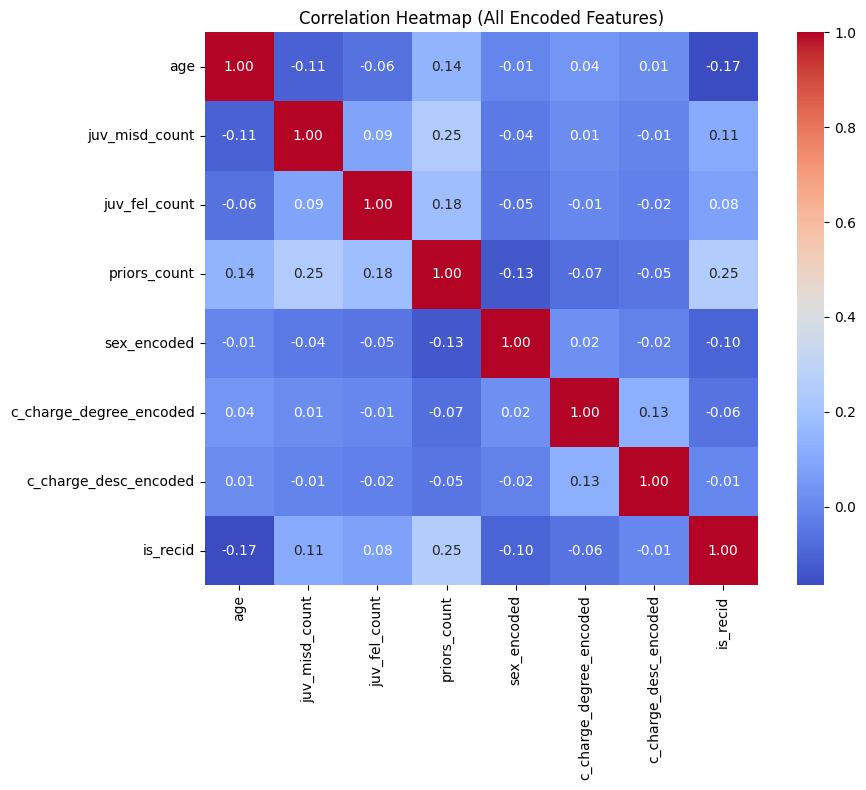

'../reports'

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set up the directory for saving plots
output_dir = "../reports"
os.makedirs(output_dir, exist_ok=True)

# Load the encoded dataset
df_encoded = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv")

# Define numeric features for boxplots and scatterplots
numeric_features = ["age", "juv_misd_count", "juv_fel_count", "priors_count"]
target = "is_recid"

# Create boxplots for each numeric feature
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=feature, data=df_encoded)
    plt.title(f"Boxplot of {feature}")
    plt.savefig(f"{output_dir}/boxplot_{feature}.png")
    plt.show()
    plt.close()

# Create scatterplots (vs. age and priors_count) colored by target
for feature in numeric_features:
    if feature != "age":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x="age", y=feature, hue=target, data=df_encoded, alpha=0.6)
        plt.title(f"Scatterplot: age vs {feature}")
        plt.tight_layout()
        plt.savefig(f"{output_dir}/scatter_age_vs_{feature}.png")
        plt.show()
        plt.close()

    if feature != "priors_count":
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x="priors_count", y=feature, hue=target, data=df_encoded, alpha=0.6)
        plt.title(f"Scatterplot: priors_count vs {feature}")
        plt.tight_layout()
        plt.savefig(f"{output_dir}/scatter_priors_vs_{feature}.png")
        plt.show()
        plt.close()

# Create a full correlation heatmap with all features
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (All Encoded Features)")
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_heatmap_all_features.png")
plt.show()
plt.close()

output_dir


After cleaning the data, a new view into numerical features statistics is interesting: 

In [1]:
import pandas as pd
import os

# Set up the reports directory
reports_dir = "../reports"
os.makedirs(reports_dir, exist_ok=True)

# Load the encoded dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv")

# Define numeric features
numeric_features = ["age", "juv_misd_count", "juv_fel_count", "priors_count", "is_recid"]

# Create statistical summary
summary = df[numeric_features].describe().round(2)

# Save summary as CSV in reports folder
summary_path = os.path.join(reports_dir, "num_feat_statistics.csv")
summary.to_csv(summary_path)

summary_path
summary 


,age,juv_misd_count,juv_fel_count,priors_count,is_recid
count,10598.00,10598.00,10598.00,10598.00,10598.00
mean,34.91,0.09,0.07,3.36,0.35
std,11.91,0.48,0.47,4.81,0.48
min,18.00,0.00,0.00,0.00,0.00
25%,25.00,0.00,0.00,0.00,0.00
50%,32.00,0.00,0.00,1.00,0.00
75%,43.00,0.00,0.00,4.00,1.00
max,96.00,13.00,20.00,43.00,1.00


Before modeling, one last step has to be accomplished: 

Feature scaling
Options applied:
- StandardScaler → zero mean, unit variance (good for linear models, PCA)
- MinMaxScaler → values scaled to [0, 1] (good for neural nets, interpretable ranges)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load dataset 
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv")

# Select features to scale
features_to_scale = ["age", "juv_misd_count", "juv_fel_count", "priors_count"]

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling
df_standard_scaled = df.copy()
df_standard_scaled[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

df_minmax_scaled = df.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Save both scaled versions
df_standard_scaled.to_csv("../data/compas_scaled_standard.csv", index=False)
df_minmax_scaled.to_csv("../data/compas_scaled_minmax.csv", index=False)

print("Scaling complete. Files saved:")
print("- compas_scaled_standard.csv")
print("- compas_scaled_minmax.csv")


Scaling complete. Files saved:
- compas_scaled_standard.csv
- compas_scaled_minmax.csv


Feature transformation: 

Before transforming features to fit normal distributions, we have to identify the underlying distributions. Let's try log-normal through plotting: If the result is more bell-shaped, log-normal is likely the distribution.

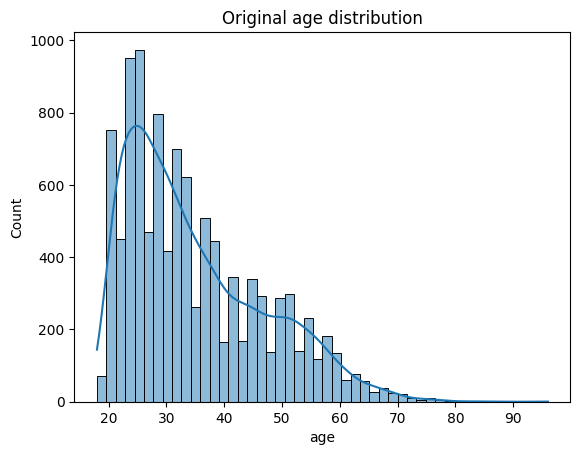

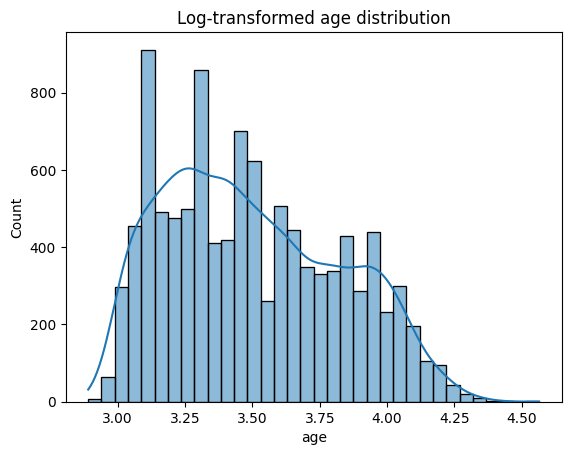

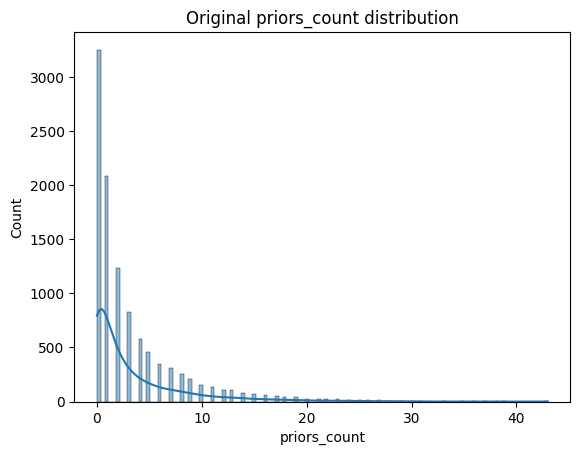

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


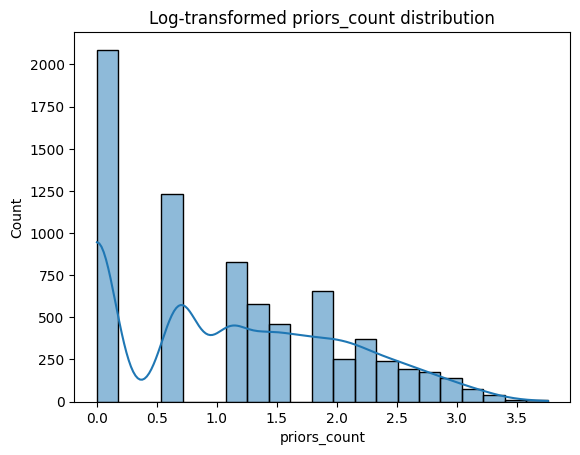

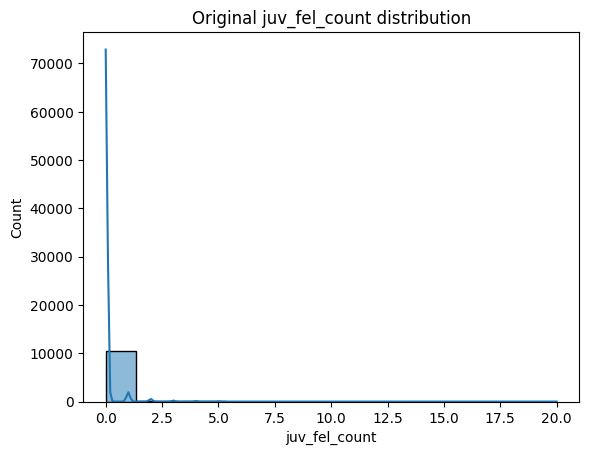

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


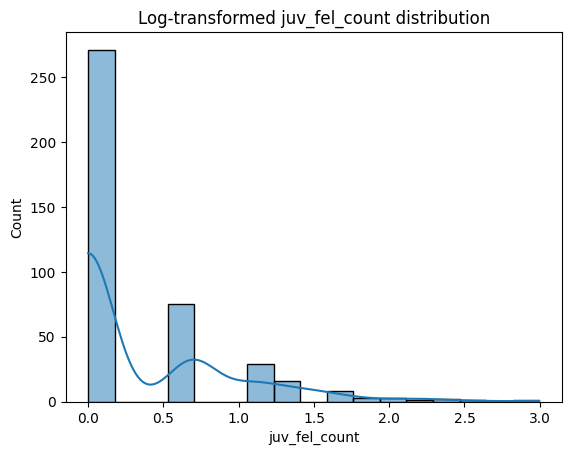

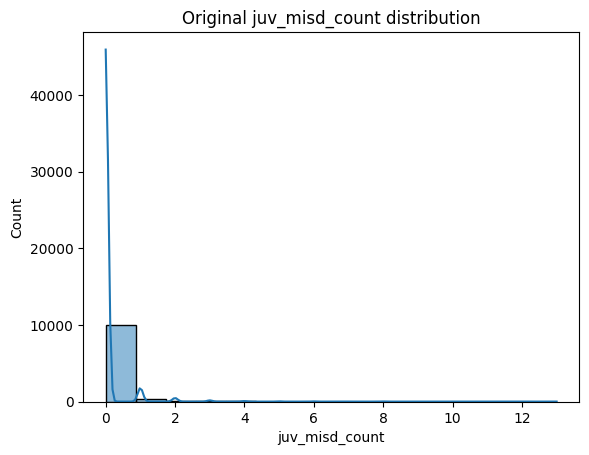

c:\Users\wastl\modelengineering\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


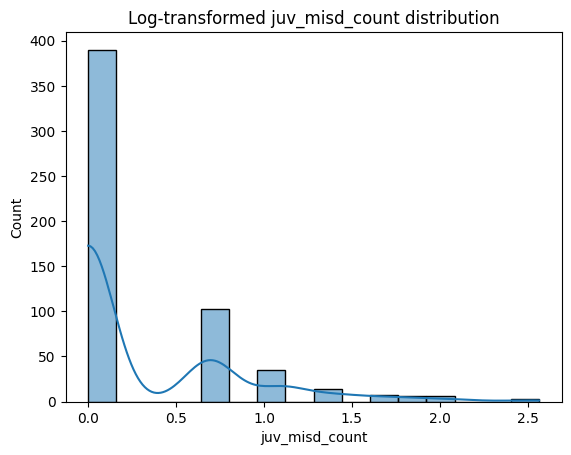

In [88]:
# Plot original age
sns.histplot(df["age"], kde=True)
plt.title("Original age distribution")
plt.show()

# Plot log-transformed age
sns.histplot(np.log(df["age"]), kde=True)
plt.title("Log-transformed age distribution")
plt.savefig("../reports/log-transformed_age_dist.png")
plt.show()
plt.close()

# Plot original priors_count
sns.histplot(df["priors_count"], kde=True)
plt.title("Original priors_count distribution")
plt.show()

# Plot log-transformed priors_count
sns.histplot(np.log(df["priors_count"]), kde=True)
plt.title("Log-transformed priors_count distribution")
plt.savefig("../reports/log-transformed_priors_count_dist.png")
plt.show()
plt.close()

# Plot original juv_fel_count
sns.histplot(df["juv_fel_count"], kde=True)
plt.title("Original juv_fel_count distribution")
plt.show()

# Plot log-transformed juv_fel_count
sns.histplot(np.log(df["juv_fel_count"]), kde=True)
plt.title("Log-transformed juv_fel_count distribution")
plt.savefig("../reports/log-transformed_juv_fel_count_dist.png")
plt.show()
plt.close()

# Plot original juv_misd_count
sns.histplot(df["juv_misd_count"], kde=True)
plt.title("Original juv_misd_count distribution")
plt.show()

# Plot log-transformed juv_misd_count
sns.histplot(np.log(df["juv_misd_count"]), kde=True)
plt.title("Log-transformed juv_misd_count distribution")
plt.savefig("../reports/log-transformed_juv_misd_count_dist.png")
plt.show()
plt.close()

Feature Transformation: 
To further test out if transformation improves data quality, run a baseline logistic regression with and without transformation and compare AUC/accuracy. If it improves, keep it, otherwise discard transformations.
- Without transformations
- With log1p-transformed features

Without Transformation - Accuracy: 0.686 | AUC: 0.716
With Log1p Transformation - Accuracy: 0.698 | AUC: 0.719


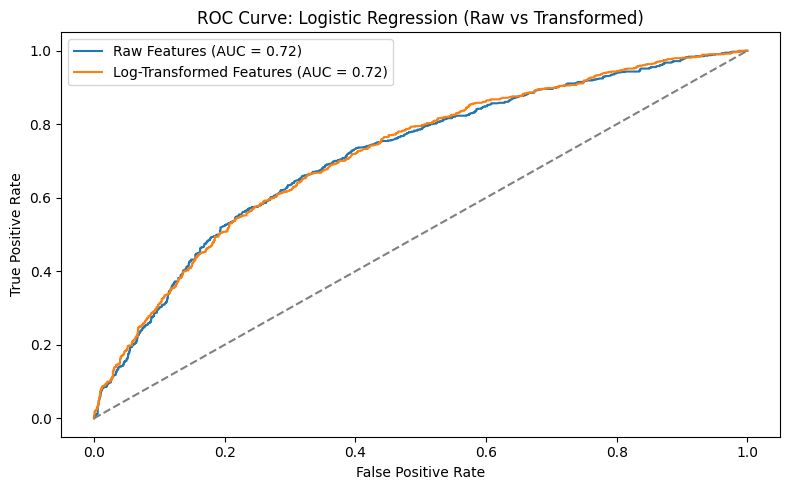

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the encoded and cleaned dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv")

# Features and target
features = ["age", "juv_misd_count", "juv_fel_count", "priors_count", 
            "sex_encoded", "c_charge_degree_encoded", "c_charge_desc_encoded"]
target = "is_recid"

# Create a log-transformed version of the numeric features
df_transformed = df.copy()
for col in ["age", "juv_misd_count", "juv_fel_count", "priors_count"]:
    df_transformed[col] = np.log1p(df_transformed[col])

# Train/test split (same split for both versions)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train_log, X_test_log, _, _ = train_test_split(df_transformed[features], df_transformed[target], test_size=0.2, random_state=42)

# Train logistic regression models
model_raw = LogisticRegression(max_iter=1000)
model_log = LogisticRegression(max_iter=1000)

model_raw.fit(X_train_raw, y_train)
model_log.fit(X_train_log, y_train)

# Predict and evaluate
y_pred_raw = model_raw.predict(X_test_raw)
y_pred_log = model_log.predict(X_test_log)

y_prob_raw = model_raw.predict_proba(X_test_raw)[:, 1]
y_prob_log = model_log.predict_proba(X_test_log)[:, 1]

# Accuracy & AUC
acc_raw = accuracy_score(y_test, y_pred_raw)
auc_raw = roc_auc_score(y_test, y_prob_raw)

acc_log = accuracy_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_prob_log)

# Print results
print("Without Transformation - Accuracy:", round(acc_raw, 3), "| AUC:", round(auc_raw, 3))
print("With Log1p Transformation - Accuracy:", round(acc_log, 3), "| AUC:", round(auc_log, 3))

# Optional: ROC Curve Plot
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_prob_raw)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(8, 5))
plt.plot(fpr_raw, tpr_raw, label=f'Raw Features (AUC = {auc_raw:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Log-Transformed Features (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve: Logistic Regression (Raw vs Transformed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("../reports/roc_comparison_logreg.png")
plt.show()


The log transformation did not improve accuracy and AUC meaningfully. Another approach is to only log-transform feature age (as it resembles a log-normal distribution) and keep all other features raw. 

In [91]:
# Copy the original dataframe
df_age_log = df.copy()

# Apply log1p to 'age' only
df_age_log["age"] = np.log1p(df_age_log["age"])

# Train/test split
from sklearn.model_selection import train_test_split
X = df_age_log[features]
y = df_age_log["is_recid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Log-Transformed Age Only — Accuracy:", round(acc, 4), "| AUC:", round(auc, 3))


Log-Transformed Age Only — Accuracy: 0.6901 | AUC: 0.717


Fairness analysis: To understand how recidivism is distributed across groups


Recidivism rate by sex:
 sex_label
female    0.378
male      0.259
Name: is_recid, dtype: float64
Recidivism rate by age group:
 age_group
<25      0.446
25-45    0.363
>45      0.242
Name: is_recid, dtype: float64

Recidivism rate by priors_group:
 priors_group
0 priors      0.211
1-5 priors    0.354
>5 priors     0.569
Name: is_recid, dtype: float64

Chi² test: sex_label vs is_recid
Chi² = 103.921 | p-value = 0.0
→ Statistically significant relationship between sex label and recidivism

Chi² test: age group vs is_recid
Chi² = 213.04 | p-value = 0.0
→ Statistically significant relationship between age group and recidivism

Chi² test: priors_group vs is_recid
Chi² = 724.539 | p-value = 0.0
→ Statistically significant relationship between age group and recidivism

Intersectional recidivism rates (age group x sex):
 sex_label  female   male
age_group               
<25         0.483  0.304
25-45       0.386  0.274
>45         0.258  0.172

Intersectional recidivism rates (priors group x

C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\3812678839.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recid_by_age = df.groupby("age_group")["is_recid"].mean().round(3)
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\3812678839.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recid_by_priors = df.groupby("priors_group")["is_recid"].mean().round(3)
C:\Users\wastl\AppData\Local\Temp\ipykernel_19928\3812678839.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

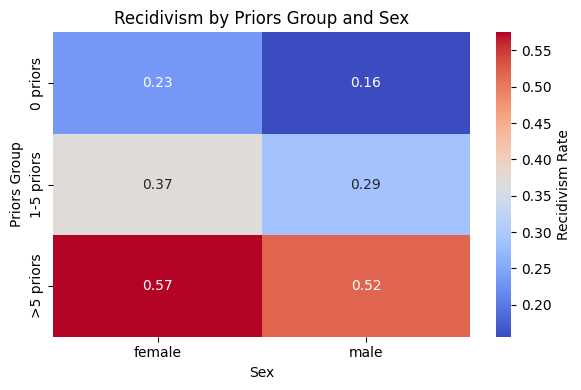

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv("../data/cox_violent_parsed_filt_dedup_featureselected_cleaned_encoded.csv")

# Map sex for readability
df["sex_label"] = df["sex_encoded"].map({0: "female", 1: "male"})

# Create age group categories
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 25, 45, df["age"].max()],
    labels=["<25", "25-45", ">45"],
    right=False
)

# Create prior count categories
df["priors_group"] = pd.cut(
    df["priors_count"],
    bins=[-1, 0, 5, df["priors_count"].max()],
    labels=["0 priors", "1-5 priors", ">5 priors"]
)

# Recidivism rate by sex
recid_by_sex = df.groupby("sex_label")["is_recid"].mean().round(3)
print("\nRecidivism rate by sex:\n", recid_by_sex)

# Recidivism rate by age group
recid_by_age = df.groupby("age_group")["is_recid"].mean().round(3)
print("Recidivism rate by age group:\n", recid_by_age)

# Recidivism rate by prior count categories
recid_by_priors = df.groupby("priors_group")["is_recid"].mean().round(3)
print("\nRecidivism rate by priors_group:\n", recid_by_priors)

# Chi-squared test (sex_label vs is_recid)
contingency_sex = pd.crosstab(df["sex_label"], df["is_recid"])
chi2_sex, p_sex, _, _ = chi2_contingency(contingency_sex)

# Chi-squared test (age_group vs is_recid)
contingency_age = pd.crosstab(df["age_group"], df["is_recid"])
chi2_age, p_age, _, _ = chi2_contingency(contingency_age)

# Chi-squared test (priors_group vs is_recid)
contingency_prior = pd.crosstab(df["priors_group"], df["is_recid"])
chi2_prior, p_prior, _, _ = chi2_contingency(contingency_prior)

print("\nChi² test: sex_label vs is_recid")
print("Chi² =", round(chi2_sex, 3), "| p-value =", round(p_sex, 4))
if p_sex < 0.05:
    print("→ Statistically significant relationship between sex label and recidivism")
else:
    print("→ No significant dependence")

print("\nChi² test: age group vs is_recid")
print("Chi² =", round(chi2_age, 3), "| p-value =", round(p_age, 4))
if p_age < 0.05:
    print("→ Statistically significant relationship between age group and recidivism")
else:
    print("→ No significant dependence")

print("\nChi² test: priors_group vs is_recid")
print("Chi² =", round(chi2_prior, 3), "| p-value =", round(p_prior, 4))
if p_prior < 0.05:
    print("→ Statistically significant relationship between age group and recidivism")
else:
    print("→ No significant dependence")

# Intersectional rates (age group x sex)
intersectional = df.groupby(["age_group", "sex_label"])["is_recid"].mean().round(3).unstack()
print("\nIntersectional recidivism rates (age group x sex):\n", intersectional)

# Intersectional rates (group by priors x sex)
intersectional_priors = df.groupby(["priors_group", "sex_label"])["is_recid"].mean().round(3).unstack()
print("\nIntersectional recidivism rates (priors group x sex):\n", intersectional_priors)


# Heatmap Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(intersectional_priors, annot=True, cmap="coolwarm", cbar_kws={'label': 'Recidivism Rate'})
plt.title("Recidivism by Priors Group and Sex")
plt.ylabel("Priors Group")
plt.xlabel("Sex")
plt.tight_layout()
plt.savefig("../reports/recidivism_by_sex_priors_heatmap.png")
plt.show()


Test possible bias at sex_label vs. is_recid with data including duplicates. 

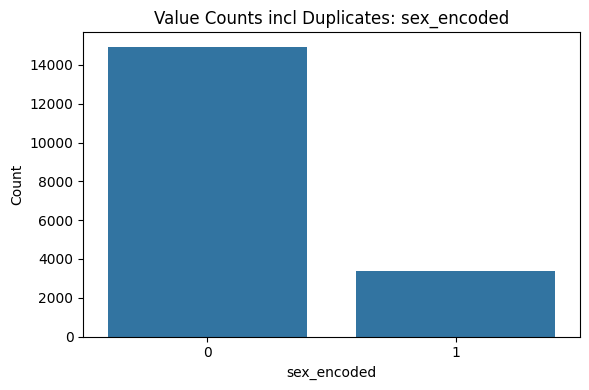


Recidivism rate by sex:
 sex_label
female    0.438
male      0.314
Name: is_recid, dtype: float64

Chi² test: sex_label vs is_recid
Chi² = 158.584 | p-value = 0.0
→ Statistically significant relationship between sex label and recidivism


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv("../data/cox-violent-parsed_filt.csv")

# Label encode categorical features
df["sex_encoded"], sex_mapping = pd.factorize(df["sex"])
df["c_charge_degree_encoded"], degree_mapping = pd.factorize(df["c_charge_degree"])
df["c_charge_desc_encoded"], charge_mapping = pd.factorize(df["c_charge_desc"])

# Select final modeling features (encoded only)
df_encoded = df[[
    "age", "juv_misd_count", "juv_fel_count", "priors_count",
    "sex_encoded", "c_charge_degree_encoded", "c_charge_desc_encoded", "is_recid"
]]

# Save to CSV
encoded_path = "../data/cox-violent-parsed_filt_incl_duplicates_encoded.csv"
df_encoded.to_csv(encoded_path, index=False)


# Categorical feature counts (raw values for human readability)
categorical_features = ["sex_encoded"]

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Value Counts incl Duplicates: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"../reports/value_counts_{col}.png")
    plt.show()
    plt.close()

# Map sex for readability
df["sex_label"] = df["sex_encoded"].map({0: "female", 1: "male"})

# Recidivism rate by sex
recid_by_sex = df.groupby("sex_label")["is_recid"].mean().round(3)
print("\nRecidivism rate by sex:\n", recid_by_sex)

# Chi-squared test (sex_label vs is_recid)
contingency_sex = pd.crosstab(df["sex_label"], df["is_recid"])
chi2_sex, p_sex, _, _ = chi2_contingency(contingency_sex)

print("\nChi² test: sex_label vs is_recid")
print("Chi² =", round(chi2_sex, 3), "| p-value =", round(p_sex, 4))
if p_sex < 0.05:
    print("→ Statistically significant relationship between sex label and recidivism")
else:
    print("→ No significant dependence")